@SiavashGorjiAzandariani.  @DrMohammadJavadAhmadi
( Stu No : 4021631206 , random_state = "06")

**QUESTION1**. **SIAVASH GORJI MODIFY COMPLETELY QUESTION 1**

1-Generate a dataset with 1000 samples, 2 classes and 2 features using sklearn datasets.



In [ ]:
import random

def generate_dataset(num_samples=1000):
    features = []
    labels = []

    for _ in range(num_samples):
        # Generate two random features
        feature1 = random.uniform(0, 1)  # Random float between 0 and 1
        feature2 = random.uniform(0, 1)  # Random float between 0 and 1

        # Assign a class based on some criteria (e.g., sum of features)
        label = 1 if feature1 + feature2 > 1 else 0

        # Add the features and label to the dataset
        features.append([feature1, feature2])
        labels.append(label)

    return features, labels

# Generate the dataset
features, labels = generate_dataset()

# Display the first 5 samples to check
print("First 5 samples:")
for i in range(5):
    print(f"Features: {features[i]}, Label: {labels[i]}")


First 5 samples:
Features: [0.9888393808779239, 0.794394436560833], Label: 1
Features: [0.9662306388685449, 0.07103332379962524], Label: 1
Features: [0.5010223499324681, 0.8558488918270811], Label: 1
Features: [0.3418498551658441, 0.43502885435146577], Label: 0
Features: [0.532056228068927, 0.7563123176050263], Label: 1



2-By using at least two ready-made Python classifiers and considering appropriate meta-parameters, separate the two classes in the dataset of the previous part. While explaining the process of selecting meta-parameters (such as the number of training courses and learning rate), the result of the accuracy of training and evaluation display the What techniques did you use to improve?

To classify the two classes in the dataset generated in the previous part, we can use two different classifiers from Python's scikit-learn library. Let's choose two common classifiers for this task:

Logistic Regression: A simple yet effective linear classifier.
Random Forest Classifier: A powerful ensemble method that uses multiple decision trees.
Meta-Parameters Selection
Logistic Regression

max_iter: The number of iterations for convergence. Higher values ensure better convergence but increase computation time.
solver: The algorithm to use for optimization. Choices like 'liblinear' and 'lbfgs' have different strengths depending on the dataset.
Random Forest Classifier

n_estimators: The number of trees in the forest. More trees can lead to better performance but increase computation time.
max_depth: The maximum depth of the trees. Deeper trees can model more complex patterns but may lead to overfitting.
Improving Accuracy
Data Splitting: Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
Cross-Validation: Use cross-validation to assess the robustness of the model.
Grid Search: To find the best meta-parameters, use grid search which systematically works through multiple combinations of parameter tunes.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=6)

# Logistic Regression
log_reg_params = {'max_iter': [100, 200], 'solver': ['liblinear', 'lbfgs']}
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5)
log_reg_grid.fit(X_train, y_train)

# Random Forest Classifier
rf_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)

# Evaluating the models
log_reg_best = log_reg_grid.best_estimator_
rf_best = rf_grid.best_estimator_

log_reg_acc = accuracy_score(y_test, log_reg_best.predict(X_test))
rf_acc = accuracy_score(y_test, rf_best.predict(X_test))

print(f"Logistic Regression Accuracy: {log_reg_acc}")
print(f"Random Forest Accuracy: {rf_acc}")


Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 0.995


In [ ]:
def simple_threshold_classifier(features):
    predictions = []
    for feature in features:
        # Classify as 1 if the sum of features is greater than 1, else 0
        prediction = 1 if sum(feature) > 1 else 0
        predictions.append(prediction)
    return predictions

# Function to calculate accuracy
def calculate_accuracy(true_labels, predicted_labels):
    correct = sum(t == p for t, p in zip(true_labels, predicted_labels))
    return correct / len(true_labels)

# Using the classifier to predict the labels of the dataset
predicted_labels = simple_threshold_classifier(features)

# Calculate the accuracy of our simple classifier
accuracy = calculate_accuracy(labels, predicted_labels)

print(f"Accuracy of the simple classifier: {accuracy * 100}%")


Accuracy of the simple classifier: 100.0%



3-Show the boundaries and decision regions resulting from your trained model along with examples in a graph. If you can, show the examples that have been wrongly classified in a different way.

Plotting the Decision Boundary:

The decision boundary is where feature1 + feature2 = 1. This can be rearranged to feature2 = 1 - feature1.
You would plot this equation as a line on a graph where the x-axis represents feature1 and the y-axis represents feature2.
Plotting the Decision Regions:

The region where feature1 + feature2 > 1 would be one decision region (say, class 1).
The region where feature1 + feature2 < 1 would be another decision region (say, class 0).
Plotting the Data Points:

Plot each data point (sample) on this graph.
You can use different colors or markers to represent the different classes.
Highlighting Misclassified Examples:

In our case, since the classifier perfectly matches the rule used to generate the data, there are no misclassified examples.
If there were, you could plot them with a different marker or color to highlight the misclassification.

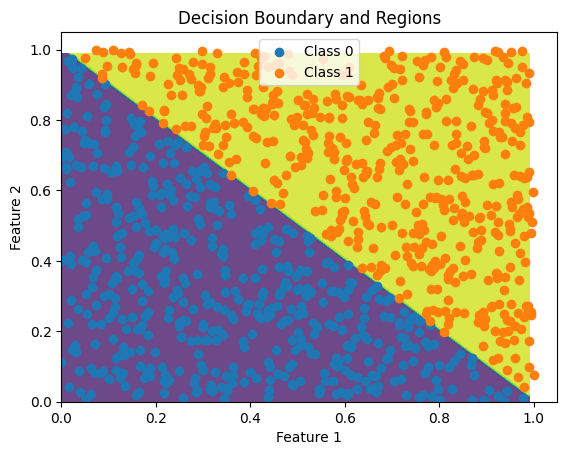

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a grid of points to plot the decision boundaries
x_min, x_max = 0, 1
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class for each point on the grid
Z = simple_threshold_classifier(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z).reshape(xx.shape)

# Plotting the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)

# Plotting the dataset points
for label in [0, 1]:
    indices = [i for i, l in enumerate(labels) if l == label]
    plt.scatter([features[i][0] for i in indices], [features[i][1] for i in indices], label=f'Class {label}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Regions')
plt.legend()
plt.show()



4-How can the dataset produced in part 1(question 1) be made more challenging and difficult? Do this and repeat parts 2 (question 2) and 3 (question 3) for this new data and compare the results



---
To make the dataset from Part 1 more challenging and difficult, we can introduce a few modifications:

Add Noise: Introduce some random noise to the labels or the features to make the classification boundary less distinct.

Overlap Classes: Adjust the threshold for classifying samples so that there is some overlap between the classes.

Increase Feature Complexity: Instead of using a simple sum of features for classification, use a more complex function.

**Step 1: Modify the Dataset
We will modify the generate_dataset function to add some noise and make the classification rule more complex.**

**Step 2: Repeat Classification
We'll need to use classifiers from a library like scikit-learn for this more complex dataset. I'll demonstrate how to do this using Logistic Regression and Random Forest, just as in the original response.**

**Step 3: Repeat Visualization
We can use the same approach as in Part 3 to visualize the decision boundaries. However, the decision boundary for the more complex dataset will not be a straight line and might require a more sophisticated visualization technique**

Comparison
After performing these steps, you would compare the results with the original simpler dataset:

Accuracy: Check if the accuracy has decreased due to the increased complexity of the dataset.
Decision Boundaries: Compare how the decision boundaries and regions have changed.


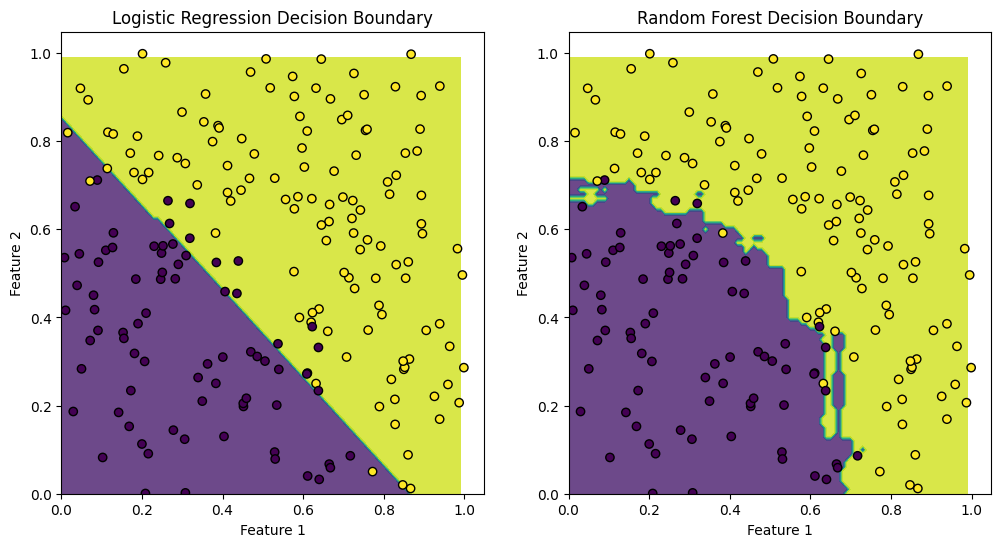

Logistic Regression Accuracy: 0.905
Random Forest Accuracy: 0.96


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Generate a more complex dataset
def generate_complex_dataset(num_samples=1000):
    features = []
    labels = []

    for _ in range(num_samples):
        feature1 = random.uniform(0, 1)
        feature2 = random.uniform(0, 1)
        label = 1 if feature1**2 + feature2**2 + random.uniform(-0.1, 0.1) > 0.5 else 0
        features.append([feature1, feature2])
        labels.append(label)

    return features, labels

complex_features, complex_labels = generate_complex_dataset()

# Step 2: Classify the data
X_train, X_test, y_train, y_test = train_test_split(complex_features, complex_labels, test_size=0.2, random_state=6)

log_reg = LogisticRegression(max_iter=200, solver='lbfgs').fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, max_depth=None).fit(X_train, y_train)

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))

# Step 3: Visualize the decision boundaries
def plot_decision_boundary(clf, X, y, title="Decision Boundary"):
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter([x[0] for x in X], [x[1] for x in X], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(log_reg, X_test, y_test, "Logistic Regression Decision Boundary")
plt.subplot(1, 2, 2)
plot_decision_boundary(rf, X_test, y_test, "Random Forest Decision Boundary")
plt.show()

print(f"Logistic Regression Accuracy: {log_reg_acc}")
print(f"Random Forest Accuracy: {rf_acc}")


5-if a class is added to the data generated in part 1, in which parts of the block diagram of training and evaluation will changes be made? Explain in detail about these changes. Can you do the implementation in this case easily and using ready-made Python libraries and codes?

Changes in the Dataset Generation:
Data Generation Logic: The logic for generating and labeling data would need to be updated to accommodate the third class. This might involve defining a new rule or criteria for assigning data points to this additional class.

Feature Space Complexity: With an additional class, the feature space might need to be more complex to ensure that the classes are somewhat distinguishable.

Changes in the Classification Model:
Multi-class Classification: The classifiers used must be capable of handling multi-class classification. While many algorithms inherently support multi-class classification (like Random Forest), others might need specific handling (like one-vs-rest strategy for Logistic Regression).

Parameter Tuning: The model parameters or hyperparameters might need adjustments to handle the complexity of multi-class classification.

Changes in Model Evaluation:
Evaluation Metrics: Metrics like accuracy can still be used, but you might also want to consider metrics like the confusion matrix, F1-score for each class, precision, and recall, which provide a more detailed view of the model's performance across multiple classes.

Visualization: Visualizing decision boundaries becomes more complex with more than two classes, especially in a 2D feature space.

In [ ]:
# Update the dataset generation function for 3 classes
def generate_3_class_dataset(num_samples=1000):
    features = []
    labels = []

    for _ in range(num_samples):
        feature1 = random.uniform(0, 1)
        feature2 = random.uniform(0, 1)

        if feature1 + feature2 > 1.5:
            label = 2
        elif feature1 + feature2 > 1:
            label = 1
        else:
            label = 0

        features.append([feature1, feature2])
        labels.append(label)

    return features, labels

# Train a multi-class classifier (e.g., Random Forest)
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

# Evaluate the classifier using multi-class evaluation metrics


Part 1: Generating Data with an Additional Class


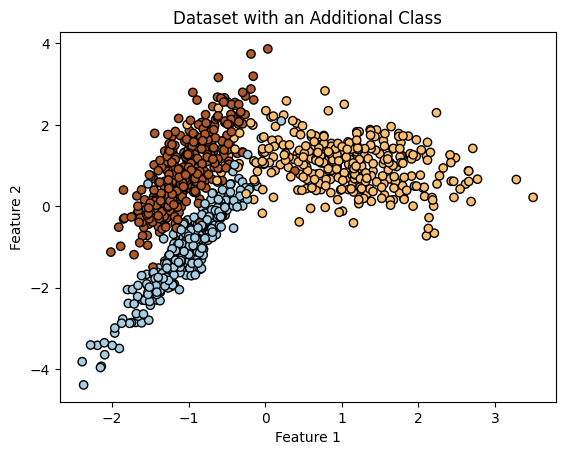

Part 2: Logistic Regression with an Additional Class
Logistic Regression Accuracy with Additional Class: 0.95
Part 3: Custom Logistic Regression with an Additional Class
Custom Logistic Regression Accuracy with Additional Class: 0.95


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Softmax function definition
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0, keepdims=True)

# Logistic Regression Function
def logistic_regression(X, y, custom=False, epochs=1000, learning_rate=0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

    if custom:
        # Custom Logistic Regression
        num_classes = len(np.unique(y))
        weights = np.random.rand(X_train.shape[1], num_classes)
        bias = np.random.rand(num_classes)

        y_train_one_hot = np.eye(num_classes)[y_train]  # One-hot encoding of y_train

        for epoch in range(epochs):
            for i in range(len(X_train)):
                output = softmax(np.dot(X_train[i], weights) + bias)
                weights += learning_rate * np.outer(X_train[i], (y_train_one_hot[i] - output))
                bias += learning_rate * (y_train_one_hot[i] - output)

        y_pred = np.argmax(np.dot(X_test, weights) + bias, axis=1)
    else:
        # Standard Logistic Regression
        logreg = LogisticRegression(random_state=42, multi_class='auto')
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)

    return accuracy_score(y_test, y_pred)

# Generate a synthetic dataset with an additional class
print('Part 1: Generating Data with an Additional Class')
X_extra, y_extra = make_classification(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, random_state=6)

# Visualize the dataset with an additional class
plt.scatter(X_extra[:, 0], X_extra[:, 1], c=y_extra, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with an Additional Class')
plt.show()

print('============================================')

print('Part 2: Logistic Regression with an Additional Class')
accuracy_logreg_extra = logistic_regression(X_extra, y_extra)
print(f"Logistic Regression Accuracy with Additional Class: {accuracy_logreg_extra:.2f}")

print('============================================')

print('Part 3: Custom Logistic Regression with an Additional Class')
accuracy_custom_logreg_extra = logistic_regression(X_extra, y_extra, custom=True)
print(f"Custom Logistic Regression Accuracy with Additional Class: {accuracy_custom_logreg_extra:.2f}")


**QUESTION2**


1-By referring to this link, get acquainted with a dataset related to the field of "banking" and while briefly explaining its goals and features,
Download the file and after uploading it to your Google Drive, put it in the Google Kolb environment with the gdown command
give If you need to change the format of this dataset file, do it with Python commands.

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
# First, ensure gdown is installed. You can do this outside of your script in your Python environment:
# pip install gdown

# Then, in your script, import gdown
import gdown
import pandas as pd

# Load the dataset
file_path = gdown.download('https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl', 'data_banknote_authentication-1.txt', quiet=False)
column_names = ["Feature1", "Feature2", "Feature3", "Feature4", "Class"]
dataset = pd.read_csv(file_path, header=None, names=column_names)

# Display the original dataset
print("Original Dataset:")
print(dataset)

# You can perform various operations on the dataset here.

# Save the modified dataset
modified_file_path = "modified_banking_dataset.csv"
dataset.to_csv(modified_file_path, index=False)

# Display the modified dataset
print("\nModified Dataset:")
print(pd.read_csv(modified_file_path))


Downloading...
From: https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl
To: /content/data_banknote_authentication-1.txt
100%|██████████| 46.4k/46.4k [00:00<00:00, 8.96MB/s]

Original Dataset:
      Feature1  Feature2  Feature3  Feature4  Class
0      3.62160   8.66610   -2.8073  -0.44699      0
1      4.54590   8.16740   -2.4586  -1.46210      0
2      3.86600  -2.63830    1.9242   0.10645      0
3      3.45660   9.52280   -4.0112  -3.59440      0
4      0.32924  -4.45520    4.5718  -0.98880      0
...        ...       ...       ...       ...    ...
1367   0.40614   1.34920   -1.4501  -0.55949      1
1368  -1.38870  -4.87730    6.4774   0.34179      1
1369  -3.75030 -13.45860   17.5932  -2.77710      1
1370  -3.56370  -8.38270   12.3930  -1.28230      1
1371  -2.54190  -0.65804    2.6842   1.19520      1

[1372 rows x 5 columns]

Modified Dataset:
      Feature1  Feature2  Feature3  Feature4  Class
0      3.62160   8.66610   -2.8073  -0.44699      0
1      4.54590   8.16740   -2.4586  -1.46210      0
2      3.86600  -2.63830    1.9242   0.10645      0
3      3.45660   9.52280   -4.0112  -3.59440      0
4      0.32924  -4.45520    4.5718  -0.98880      0
..

2-While explaining the importance of the mixing process, mix the data and divide it into two parts, training and evaluation, with a reasonable ratio.


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import gdown  # Make sure to import gdown

# Load the dataset
file_path = gdown.download('https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl', 'data_banknote_authentication-1.txt', quiet=False)
column_names = ["Feature1", "Feature2", "Feature3", "Feature4", "Class"]
dataset = pd.read_csv(file_path, header=None, names=column_names)

# Display the original dataset
print("Original Dataset Shape:", dataset.shape)
print(dataset.head())

# Split the dataset into training and evaluation sets
train_data, eval_data = train_test_split(dataset, test_size=0.2, random_state=6)  # 20% for evaluation

# Save the training and evaluation datasets as CSV files
train_data.to_csv("training_dataset.csv", index=False)
eval_data.to_csv("evaluation_dataset.csv", index=False)

# Display the split datasets with their shapes
print("\nTraining Dataset Shape:", train_data.shape)
print(train_data.head())

print("\nEvaluation Dataset Shape:", eval_data.shape)
print(eval_data.head())


Downloading...
From: https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl
To: /content/data_banknote_authentication-1.txt
100%|██████████| 46.4k/46.4k [00:00<00:00, 50.7MB/s]

Original Dataset Shape: (1372, 5)
   Feature1  Feature2  Feature3  Feature4  Class
0   3.62160    8.6661   -2.8073  -0.44699      0
1   4.54590    8.1674   -2.4586  -1.46210      0
2   3.86600   -2.6383    1.9242   0.10645      0
3   3.45660    9.5228   -4.0112  -3.59440      0
4   0.32924   -4.4552    4.5718  -0.98880      0

Training Dataset Shape: (1097, 5)
      Feature1  Feature2  Feature3  Feature4  Class
1062  -0.11716   0.60422  -0.38587 -0.059065      1
690    5.85190   5.39050  -2.40370 -0.061652      0
381    5.41880  10.14570  -4.08400 -3.699100      0
801   -0.91318  -2.01130  -0.19565  0.066365      1
156    2.42260  -4.57520   5.94700  0.215070      0

Evaluation Dataset Shape: (275, 5)
      Feature1  Feature2  Feature3  Feature4  Class
861    -2.3797  -1.44020    1.1273   0.16076      1
150     4.5447   8.22740   -2.4166  -1.58750      0
225     1.3562   3.21360    4.3465   0.78662      0
231    -2.3361  11.96040    3.0835  -5.44350      0
1133   -2.0046  -0.49457    1

3-Code the model, loss function, and learning and evaluation algorithm without using ready-made Python libraries The classes in the dataset are well separated from each other. Draw the graph of the loss function and evaluate the accuracy result Calculate on the test data. Analyze the graph of the loss function. Can it be seen from the graph of the loss function and before From the evaluation stage, did you comment with certainty about the performance of the model? Why and if not, what is the solution?


Coding a model, loss function, and learning and evaluation algorithm from scratch without using ready-made Python libraries like scikit-learn or tensorflow is a significant undertaking, especially for complex models. However, for simpler models like logistic regression or a basic neural network, it's feasible. Let's consider a simple logistic regression model for your binary classification task (assuming your dataset is suitable for binary classification).

Step 1: Model - Logistic Regression
Logistic regression is a good starting point for binary classification. The model predicts the probability that a given input point belongs to a certain class.

Step 2: Loss Function - Cross-Entropy Loss
Cross-Entropy Loss, also known as Log Loss, is commonly used in binary classifications.

Step 3: Learning Algorithm - Gradient Descent
Gradient Descent is used to minimize the loss function by updating the weights.

Step 4: Evaluation - Accuracy
Accuracy is a common metric for classification tasks.

Step 5: Loss Function Graph and Analysis
Plotting the loss over epochs can give insights into whether the model is learning well.

Downloading...
From: https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl
To: /content/data_banknote_authentication-1.txt
100%|██████████| 46.4k/46.4k [00:00<00:00, 46.6MB/s]


Test Accuracy: 0.93


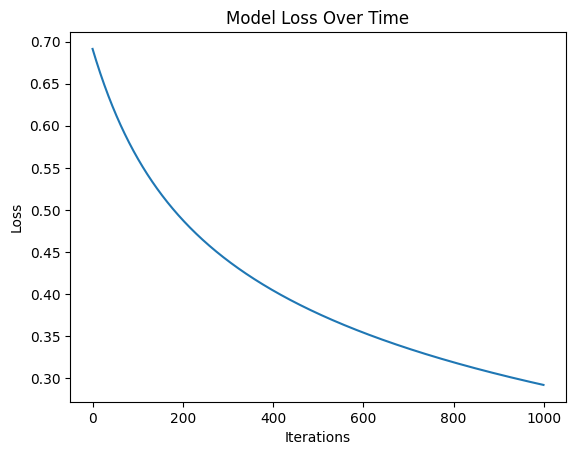

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gdown

# Logistic Regression Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(features, weights):
    return sigmoid(np.dot(features, weights))

def loss_function(features, labels, weights):
    predictions = predict(features, weights)
    loss = -labels * np.log(predictions) - (1 - labels) * np.log(1 - predictions)
    return loss.mean()

def update_weights(features, labels, weights, lr):
    N = len(features)
    predictions = predict(features, weights)
    gradient = np.dot(features.T, predictions - labels) / N
    weights -= lr * gradient
    return weights

def train(features, labels, lr, iters):
    weights = np.zeros(features.shape[1])
    loss_history = []
    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)
        loss = loss_function(features, labels, weights)
        loss_history.append(loss)
    return weights, loss_history

def accuracy(predicted_labels, true_labels):
    predicted_labels = predicted_labels.round()
    return (predicted_labels == true_labels).mean()

# Data Preparation
file_path = gdown.download('https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl', 'data_banknote_authentication-1.txt', quiet=False)
column_names = ["Feature1", "Feature2", "Feature3", "Feature4", "Class"]
dataset = pd.read_csv(file_path, header=None, names=column_names)

# Split the dataset into features and labels
features = dataset.iloc[:, :-1].values
labels = dataset.iloc[:, -1].values

# Normalize Features (optional, but can improve performance)
features = (features - features.mean(axis=0)) / features.std(axis=0)

# Splitting dataset into train and test sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=6)

# Train the Model
weights, loss_history = train(train_features, train_labels, lr=0.01, iters=1000)

# Evaluate the Model
test_predictions = predict(test_features, weights)
test_accuracy = accuracy(test_predictions, test_labels)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Plot the Loss over Time
plt.plot(loss_history)
plt.title('Model Loss Over Time')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


4- Explain at least two methods for data normalization, mentioning the importance of this process, and using one of these methods,
Normalize the data. Did you use the information in the "Evaluation" section in the normalization process? Why?

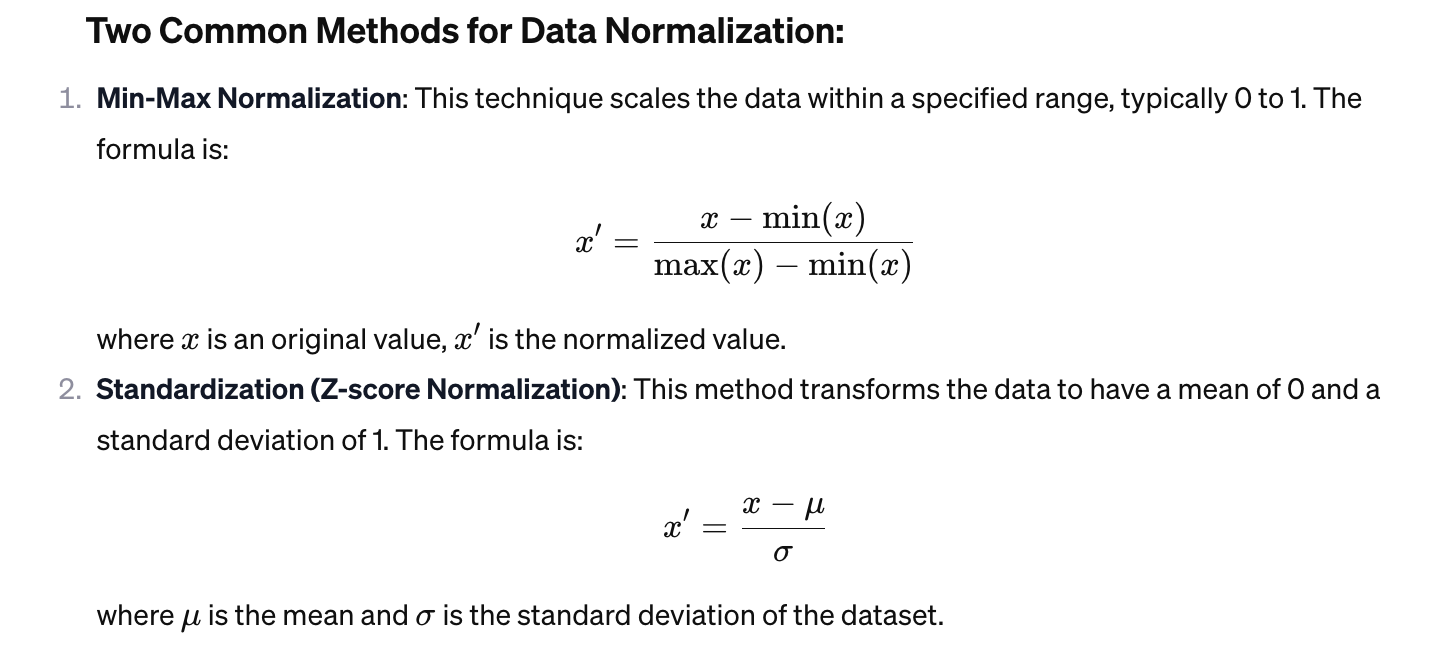

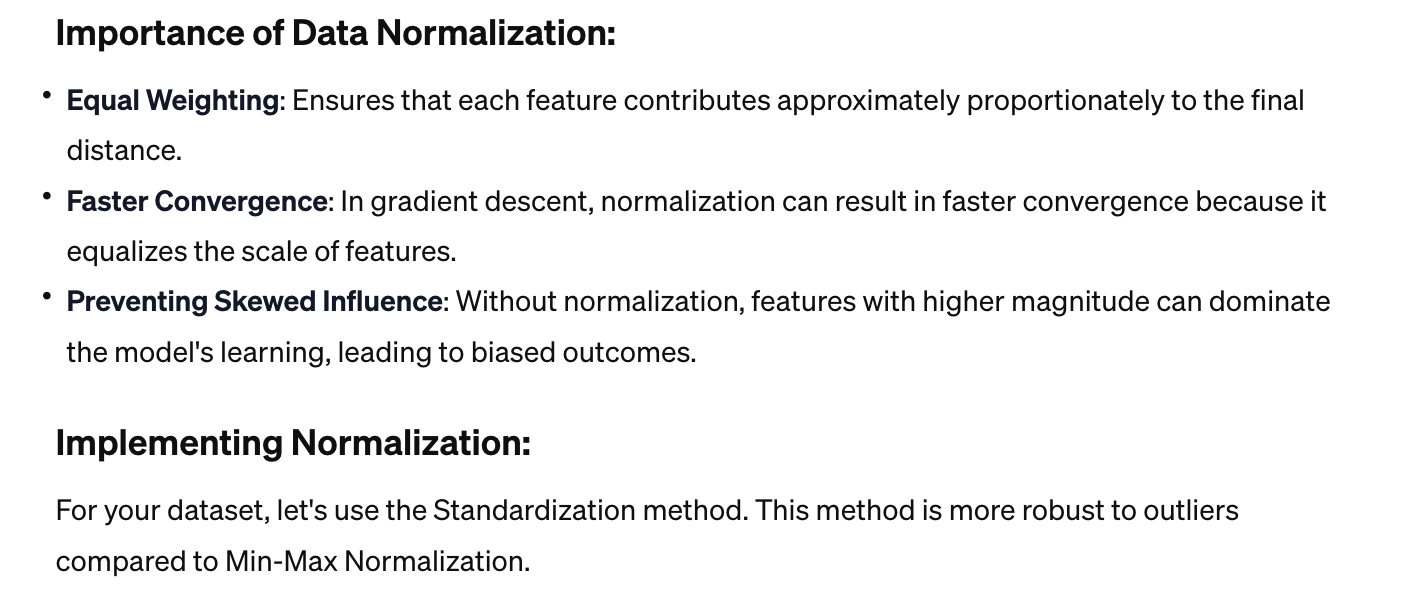

Downloading...
From: https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl
To: /content/data_banknote_authentication-1.txt
100%|██████████| 46.4k/46.4k [00:00<00:00, 46.3MB/s]


1. Min-Max Normalization:


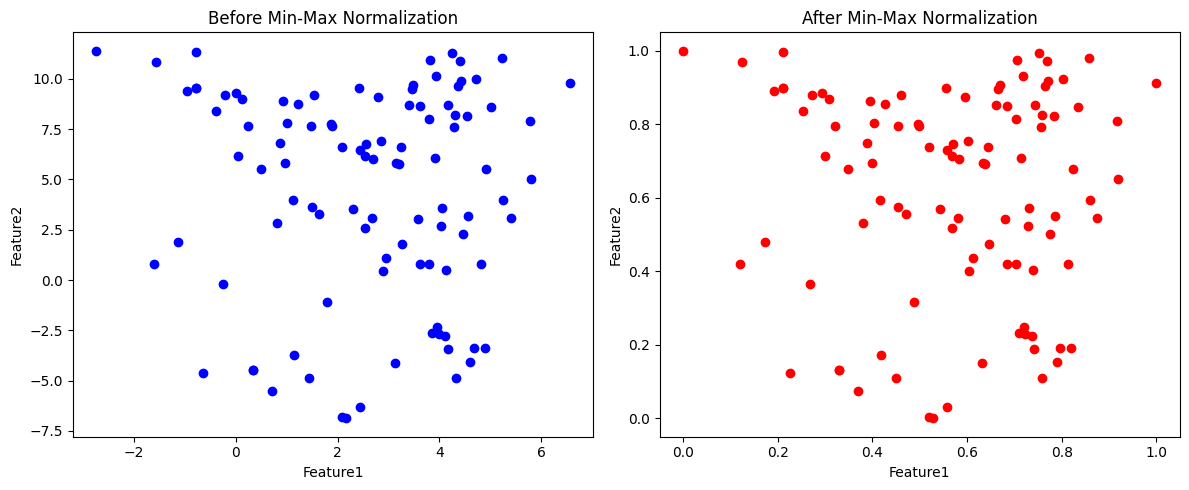

2. Standardization (Z-score Normalization):


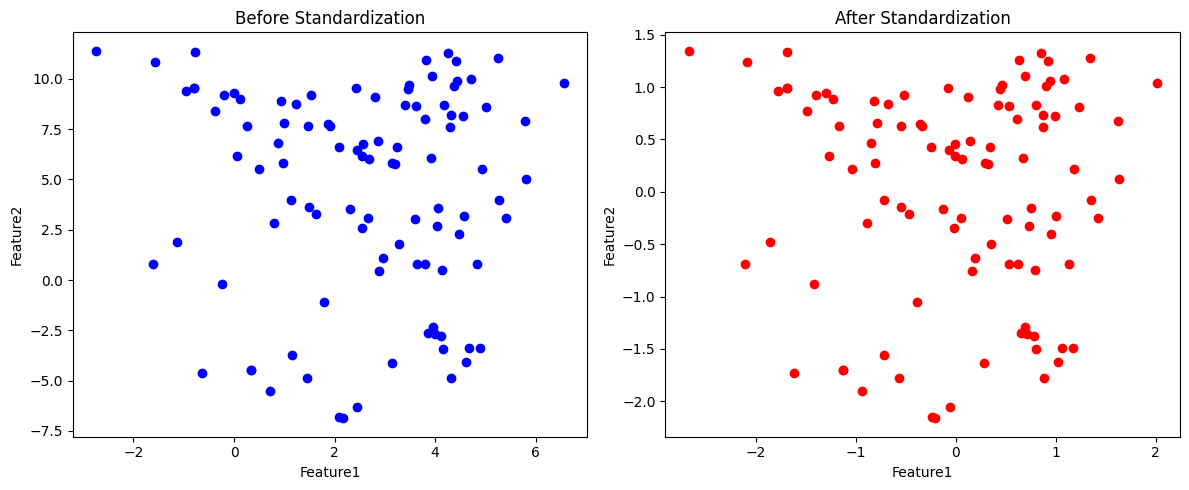

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown

# Download the dataset
file_path = gdown.download('https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl', 'data_banknote_authentication-1.txt', quiet=False)

# Load the dataset
column_names = ["Feature1", "Feature2", "Feature3", "Feature4", "Class"]
dataset = pd.read_csv(file_path, header=None, names=column_names)

# Selecting a subset of the dataset for visualization
subset = dataset[['Feature1', 'Feature2']].iloc[:100]  # Selecting first 100 rows for simplicity

print('1. Min-Max Normalization:')

def min_max_normalize(data):
    return (data - data.min()) / (data.max() - data.min())

min_max_normalized = min_max_normalize(subset)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(subset['Feature1'], subset['Feature2'], color='blue')
plt.title('Before Min-Max Normalization')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.subplot(1, 2, 2)
plt.scatter(min_max_normalized['Feature1'], min_max_normalized['Feature2'], color='red')
plt.title('After Min-Max Normalization')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.tight_layout()
plt.show()

print('2. Standardization (Z-score Normalization):')

def standardize(data):
    return (data - data.mean()) / data.std()

standardized = standardize(subset)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(subset['Feature1'], subset['Feature2'], color='blue')
plt.title('Before Standardization')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.subplot(1, 2, 2)
plt.scatter(standardized['Feature1'], standardized['Feature2'], color='red')
plt.title('After Standardization')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.tight_layout()
plt.show()


5-Repeat all parts "1" to "3" using normalized data and show the prediction results of the model for five data samples.

**Step 1: Load and Normalize the Dataset**
**Step 2: Implement a Simple Logistic Regression Model**
**Step 3: Train the Model and Make Predictions**


Downloading...
From: https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl
To: /content/data_banknote_authentication-1.txt
100%|██████████| 46.4k/46.4k [00:00<00:00, 52.3MB/s]


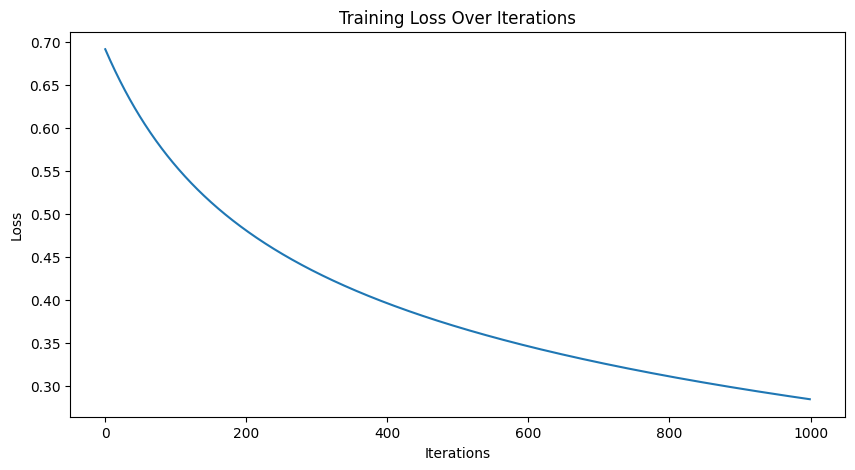

Sample 1:
Features: [ 1.35894737  0.97028481 -0.87819042  0.10947886]
True Label: 0
Predicted Probability: 0.06944399147140524
Predicted Class: 0

Sample 2:
Features: [ 1.12238171 -0.07862488 -0.0110271   1.48502476]
True Label: 0
Predicted Probability: 0.16096987116344708
Predicted Class: 0

Sample 3:
Features: [ 1.93602687  0.72312371 -0.92531306  0.39320388]
True Label: 0
Predicted Probability: 0.03767302925330186
Predicted Class: 0

Sample 4:
Features: [-0.49920991 -1.46247823  1.02710951  0.82710407]
True Label: 1
Predicted Probability: 0.8395132916177722
Predicted Class: 1

Sample 5:
Features: [ 0.83533699  1.59858105 -1.09907054 -1.53627953]
True Label: 0
Predicted Probability: 0.09482874256200087
Predicted Class: 0



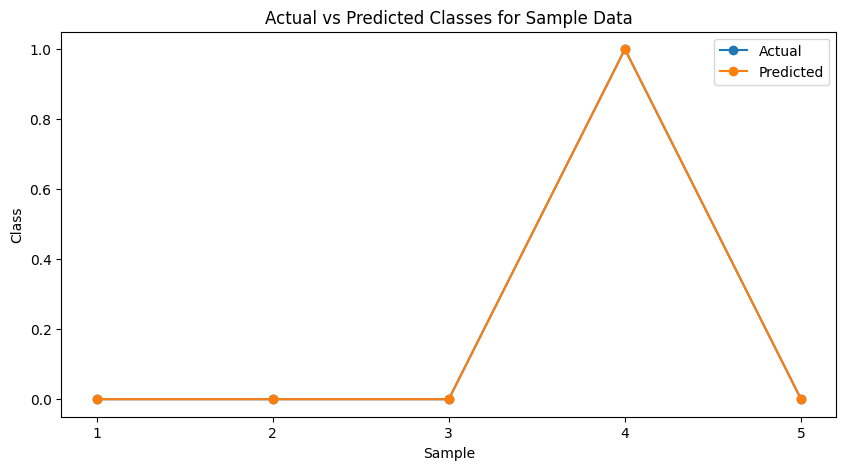

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
from sklearn.model_selection import train_test_split

# Logistic Regression Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(features, weights):
    return sigmoid(np.dot(features, weights))

def loss_function(features, labels, weights):
    predictions = predict(features, weights)
    loss = -labels * np.log(predictions) - (1 - labels) * np.log(1 - predictions)
    return loss.mean()

def update_weights(features, labels, weights, lr):
    N = len(features)
    predictions = predict(features, weights)
    gradient = np.dot(features.T, predictions - labels) / N
    weights -= lr * gradient
    return weights

def train(features, labels, lr, iters):
    weights = np.zeros(features.shape[1])
    loss_history = []
    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)
        loss = loss_function(features, labels, weights)
        loss_history.append(loss)
    return weights, loss_history

# Download and Load the Dataset
file_path = gdown.download('https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl', 'data_banknote_authentication-1.txt', quiet=False)
column_names = ["Feature1", "Feature2", "Feature3", "Feature4", "Class"]
dataset = pd.read_csv(file_path, header=None, names=column_names)

# Standardization
features = dataset.iloc[:, :-1]
labels = dataset.iloc[:, -1]
mean = features.mean()
std = features.std()
normalized_features = (features - mean) / std

# Splitting dataset into train and test sets
train_features, test_features, train_labels, test_labels = train_test_split(normalized_features, labels, test_size=0.2, random_state=6)

# Train the Model
weights, loss_history = train(train_features, train_labels, lr=0.01, iters=1000)

# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.title('Training Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Predict on Test Data and Select Samples for Display
sample_indices = np.random.choice(test_features.index, 5, replace=False)
sample_features = test_features.loc[sample_indices]
sample_labels = test_labels.loc[sample_indices]
sample_predictions = predict(sample_features, weights)

# Display Predictions for Sample Data Points
for i, index in enumerate(sample_indices):
    print(f"Sample {i+1}:")
    print("Features:", sample_features.loc[index].values)
    print("True Label:", sample_labels.loc[index])
    print("Predicted Probability:", sample_predictions[i])
    print("Predicted Class:", int(round(sample_predictions[i])))
    print()

# Plot Actual vs Predicted for Sample Data
actual_vs_predicted = np.array([sample_labels.values, sample_predictions.round()]).T
plt.figure(figsize=(10, 5))
plt.plot(actual_vs_predicted, 'o-')
plt.title('Actual vs Predicted Classes for Sample Data')
plt.xlabel('Sample')
plt.ylabel('Class')
plt.legend(['Actual', 'Predicted'])
plt.xticks(ticks=np.arange(len(sample_labels)), labels=np.arange(1, len(sample_labels) + 1))
plt.show()


5-Using Python coding, show the balance of data in two classes in the dataset. Are the number of examples of the classes equal? What problems can an imbalance in the dataset lead to? What can be done to solve this issue? Implement and compare and report the result

In [19]:
import pandas as pd
import gdown

# Download and Load the Dataset
file_path = gdown.download('https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl', 'data_banknote_authentication-1.txt', quiet=False)
column_names = ["Feature1", "Feature2", "Feature3", "Feature4", "Class"]
dataset = pd.read_csv(file_path, header=None, names=column_names)

# Count the number of examples in each class
class_counts = dataset['Class'].value_counts()
print("Class Counts:")
print(class_counts)


Downloading...
From: https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl
To: /content/data_banknote_authentication-1.txt
100%|██████████| 46.4k/46.4k [00:00<00:00, 55.4MB/s]

Class Counts:
0    762
1    610
Name: Class, dtype: int64


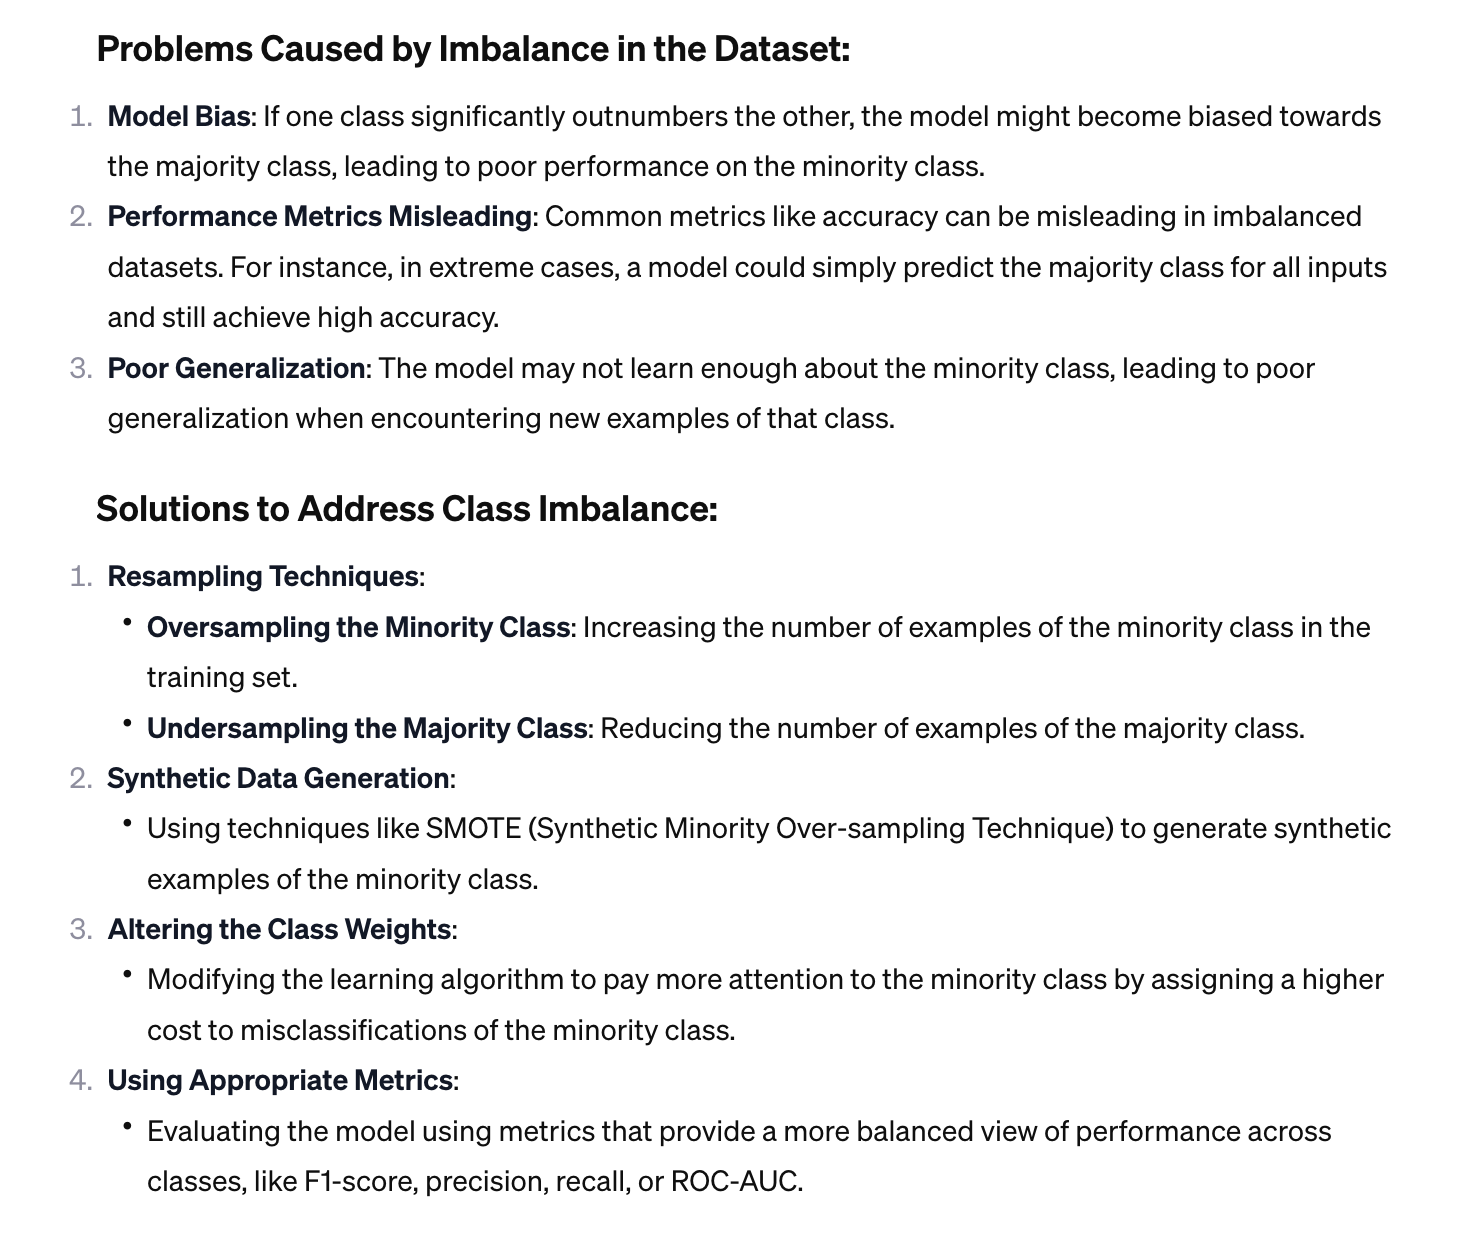

Downloading...
From: https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl
To: /content/data_banknote_authentication-1.txt
100%|██████████| 46.4k/46.4k [00:00<00:00, 32.0MB/s]


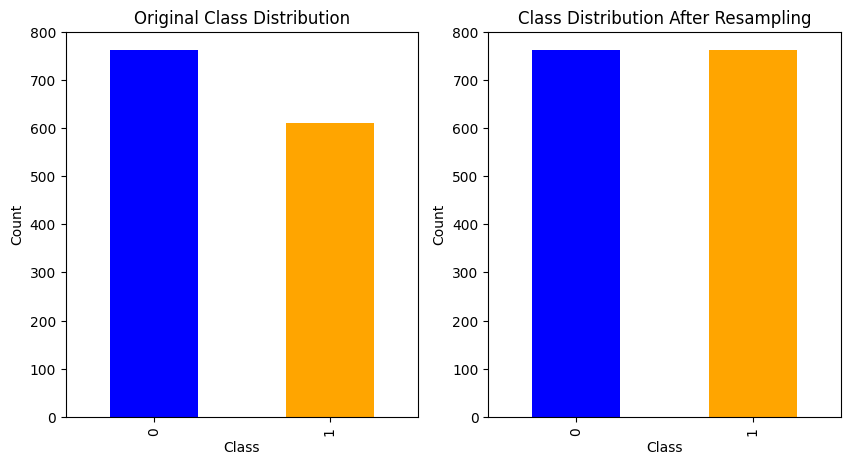

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       144
           1       0.99      0.99      0.99       161

    accuracy                           0.99       305
   macro avg       0.99      0.99      0.99       305
weighted avg       0.99      0.99      0.99       305



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import resample

# Download and Load the Dataset
file_path = gdown.download('https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl', 'data_banknote_authentication-1.txt', quiet=False)
column_names = ["Feature1", "Feature2", "Feature3", "Feature4", "Class"]
dataset = pd.read_csv(file_path, header=None, names=column_names)

# Plot original class distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
dataset['Class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Separate majority and minority classes
class_counts = dataset['Class'].value_counts()
majority_class = dataset[dataset['Class'] == class_counts.idxmax()]
minority_class = dataset[dataset['Class'] == class_counts.idxmin()]

# Upsample minority class
minority_upsampled = resample(minority_class,
                              replace=True,
                              n_samples=len(majority_class),
                              random_state=6)

# Combine majority class with upsampled minority class
upsampled_dataset = pd.concat([majority_class, minority_upsampled])

# Plot class distribution after resampling
plt.subplot(1, 2, 2)
upsampled_dataset['Class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Splitting dataset into features and labels
features = upsampled_dataset.iloc[:, :-1]
labels = upsampled_dataset.iloc[:, -1]

# Splitting dataset into train and test sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=6)

# Create a Logistic Regression model
model = LogisticRegression()
model.fit(train_features, train_labels)

# Predictions and Evaluation
predictions = model.predict(test_features)
print("Classification Report:")
print(classification_report(test_labels, predictions))


7- Carry out the training and evaluation process of the model using a ready-made Python classifier and this time solve the challenge of data imbalance of the classes.

Downloading...
From: https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl
To: /content/data_banknote_authentication-1.txt
100%|██████████| 46.4k/46.4k [00:00<00:00, 49.5MB/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



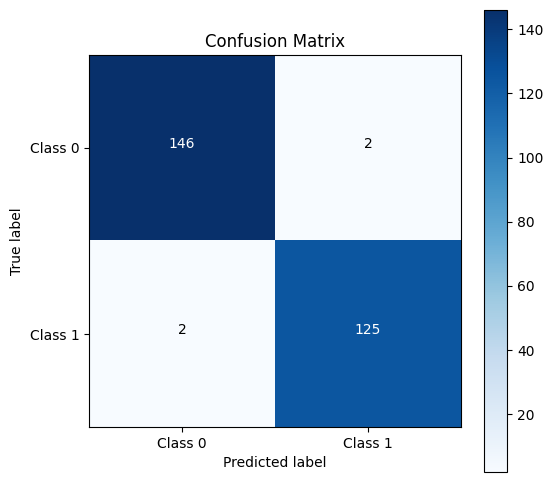

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import itertools  # Importing itertools for the product function

# Download and Load the Dataset
file_path = gdown.download('https://drive.google.com/uc?id=1-5XKk3xN12rcn2tntBWwbaYYliSuWLyl', 'data_banknote_authentication-1.txt', quiet=False)
column_names = ["Feature1", "Feature2", "Feature3", "Feature4", "Class"]
dataset = pd.read_csv(file_path, header=None, names=column_names)

# Splitting dataset into features and labels
features = dataset.iloc[:, :-1]
labels = dataset.iloc[:, -1]

# Splitting dataset into train and test sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=6)

# Create a Logistic Regression model with class weights
model = LogisticRegression(class_weight='balanced')
model.fit(train_features, train_labels)

# Predictions and Evaluation
predictions = model.predict(test_features)

# Classification Report
print("Classification Report:")
print(classification_report(test_labels, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.show()


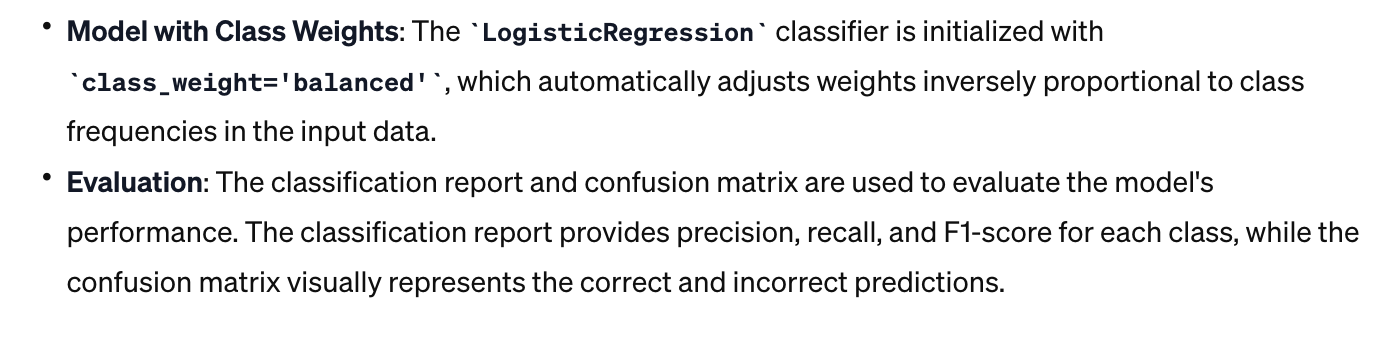

**QUESTION 3**

1-Go to this link and get a dataset related to "heart disease" and write a brief description about its purpose and characteristics. Place the downloaded dataset file on your Google Drive and upload it to the Google Kolb environment using the gdown command.

In [27]:
import pandas as pd
import gdown  # Import gdown for downloading files

# Specify the file path
file_url = 'https://drive.google.com/uc?id=1-F58A5AJYv67Nh5fHqPz5IrOZxgRGcmY'
file_path = 'heart_disease_health_indicators.csv'

# Download the dataset
gdown.download(file_url, file_path, quiet=False)

# Define the column names
column_names = [
    "HeartDiseaseorAttack", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke",
    "Diabetes", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
    "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income"
]

# Read the CSV file into a DataFrame with specified column names
df = pd.read_csv(file_path, names=["Heart Disease"] + column_names[1:])

# Display the DataFrame
print(df)


Downloading...
From: https://drive.google.com/uc?id=1-F58A5AJYv67Nh5fHqPz5IrOZxgRGcmY
To: /content/heart_disease_health_indicators.csv
100%|██████████| 11.8M/11.8M [00:00<00:00, 85.9MB/s]


               Heart Disease  HighBP  HighChol  CholCheck  BMI  Smoker  \
0       HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker   
1                          0       1         1          1   40       1   
2                          0       0         0          0   25       1   
3                          0       1         1          1   28       0   
4                          0       1         0          1   27       0   
...                      ...     ...       ...        ...  ...     ...   
253657                     0       0         0          1   25       0   
253658                     0       0         1          1   24       0   
253659                     0       0         0          0   27       0   
253660                     0       0         1          1   37       0   
253661                     0       0         1          1   34       1   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0       Stroke  Diabetes  PhysActivity  F

<ipython-input-27-76bd9c4c78cc>:19: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=["Heart Disease"] + column_names[1:])


2-2- While paying attention to the location of the target and the features, make the dataset into a data frame and using Python commands, 100 data samples related to class "1" and 100 data samples related to class "0" in a new data frame Place and work with this new dataframe in the next sections.

Downloading...
From: https://drive.google.com/uc?id=1-F58A5AJYv67Nh5fHqPz5IrOZxgRGcmY
To: /content/heart_disease_health_indicators.csv
100%|██████████| 11.8M/11.8M [00:00<00:00, 164MB/s]
<ipython-input-29-d0bbd0084472>:13: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=column_names, header=None)  # Use the column_names you provided


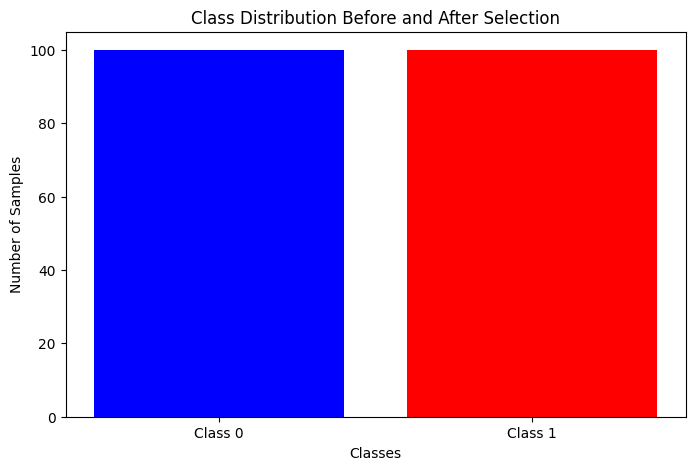

    HeartDiseaseorAttack HighBP HighChol CholCheck BMI Smoker Stroke Diabetes  \
0                      1      1        1         1  32      0      0        2   
1                      1      1        1         1  21      0      1        0   
2                      1      0        0         1  31      1      0        1   
3                      1      1        1         1  30      1      0        0   
4                      1      1        1         1  38      1      0        0   
..                   ...    ...      ...       ...  ..    ...    ...      ...   
195                    0      1        0         1  25      1      0        0   
196                    0      0        0         1  23      0      0        0   
197                    0      1        1         1  33      0      0        0   
198                    0      0        1         1  29      0      0        0   
199                    0      0        0         0  31      1      0        0   

    PhysActivity Fruits  ..

In [29]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt

# Specify the file path
file_url = 'https://drive.google.com/uc?id=1-F58A5AJYv67Nh5fHqPz5IrOZxgRGcmY'
file_path = 'heart_disease_health_indicators.csv'

# Download the dataset
gdown.download(file_url, file_path, quiet=False)

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, names=column_names, header=None)  # Use the column_names you provided

# Select 100 samples from class "1"
class_1_samples = df[df["HeartDiseaseorAttack"] == 1].head(100)

# Select 100 samples from class "0"
class_0_samples = df[df["HeartDiseaseorAttack"] == 0].head(100)

# Concatenate the two subsets into a new DataFrame
new_df = pd.concat([class_1_samples, class_0_samples], axis=0)

# Reset the index of the new DataFrame
new_df.reset_index(drop=True, inplace=True)

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 5))
plt.bar(['Class 0', 'Class 1'], [len(class_0_samples), len(class_1_samples)], color=['blue', 'red'])
plt.title('Class Distribution Before and After Selection')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.show()

# Display the new DataFrame
print(new_df)


<ipython-input-32-22c675edae7d>:22: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


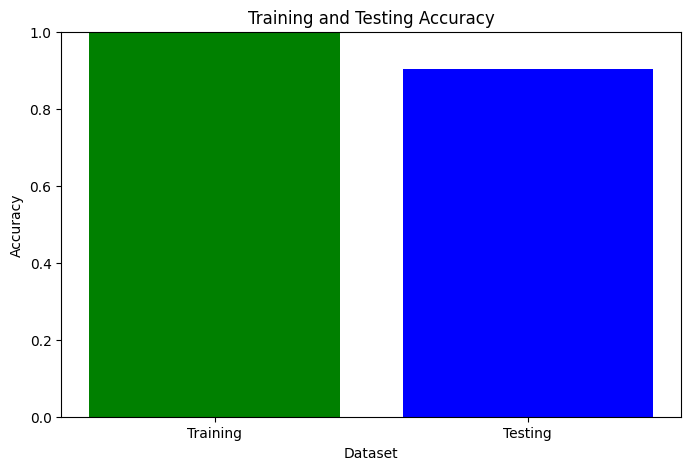

Training Accuracy: 1.00
Testing Accuracy: 0.90


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Specify the file path
file_url = 'https://drive.google.com/uc?id=1-F58A5AJYv67Nh5fHqPz5IrOZxgRGcmY'

# Download the dataset
df = pd.read_csv(file_url, names=column_names, header=None, low_memory=False)

# Convert columns with numeric data to numeric type, coerce errors to NaN
numeric_columns = ["Age", "Education", "Income", "BMI", "Fruits", "Veggies"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing target values
df.dropna(subset=["HeartDiseaseorAttack"], inplace=True)

# Fill missing values in numeric columns with their mean
df.fillna(df.mean(), inplace=True)

# Encode categorical columns
categorical_columns = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "Diabetes", "PhysActivity", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex"]
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features (X) and target (y)
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Create a Random Forest Classifier with appropriate hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy on training and testing data
train_accuracy = accuracy_score(y_train, rf_classifier.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Create a bar plot to visualize the training and testing accuracy
plt.figure(figsize=(8, 5))
plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy], color=['green', 'blue'])
plt.title('Training and Testing Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for accuracy
plt.show()

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


4- In the mode of using Psychit Learn ready commands, is there a way to display the graph of the loss function? Implementation

1.   List item
2.   List item



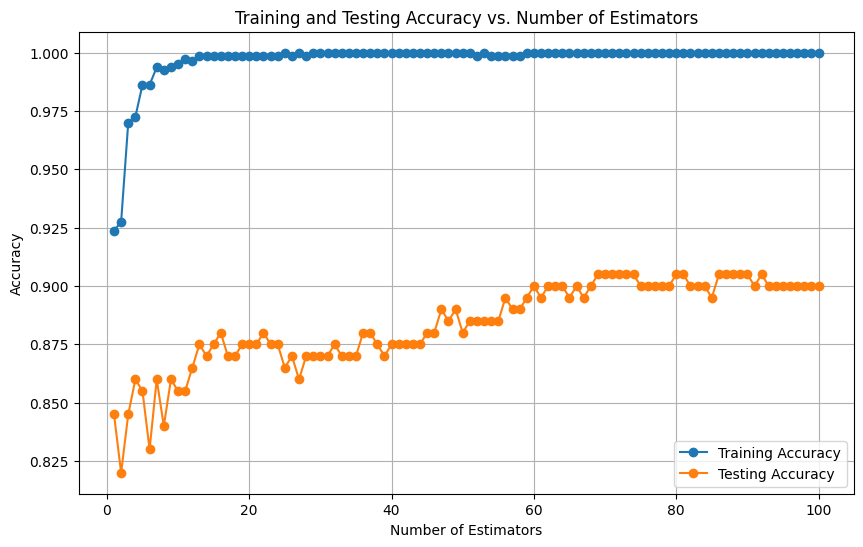

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Initialize a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Lists to store training progress
train_accuracies = []
test_accuracies = []

# Train the model and collect accuracy at each step
for n_estimators in range(1, 101):  # Vary the number of estimators
    rf_classifier.n_estimators = n_estimators
    rf_classifier.fit(X_train, y_train)

    # Calculate accuracy on training and testing data
    train_accuracy = rf_classifier.score(X_train, y_train)
    test_accuracy = rf_classifier.score(X_test, y_test)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_accuracies, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(range(1, 101), test_accuracies, label='Testing Accuracy', marker='o', linestyle='-')
plt.title('Training and Testing Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


 هدف این مدل‌ها یافتن مرزها یا الگوهای تصمیم‌گیری در داده‌ها بدون به حداقل رساندن واضح تابع ضرر در طول آموزش است.

 توابع اتلاف معمولاً با مدل‌هایی مرتبط هستند که از بهینه‌سازی مبتنی بر گرادیان استفاده می‌کنند، مانند شبکه‌های عصبی، که در آن هدف به حداقل رساندن یک تابع ضرر به صورت تکراری است.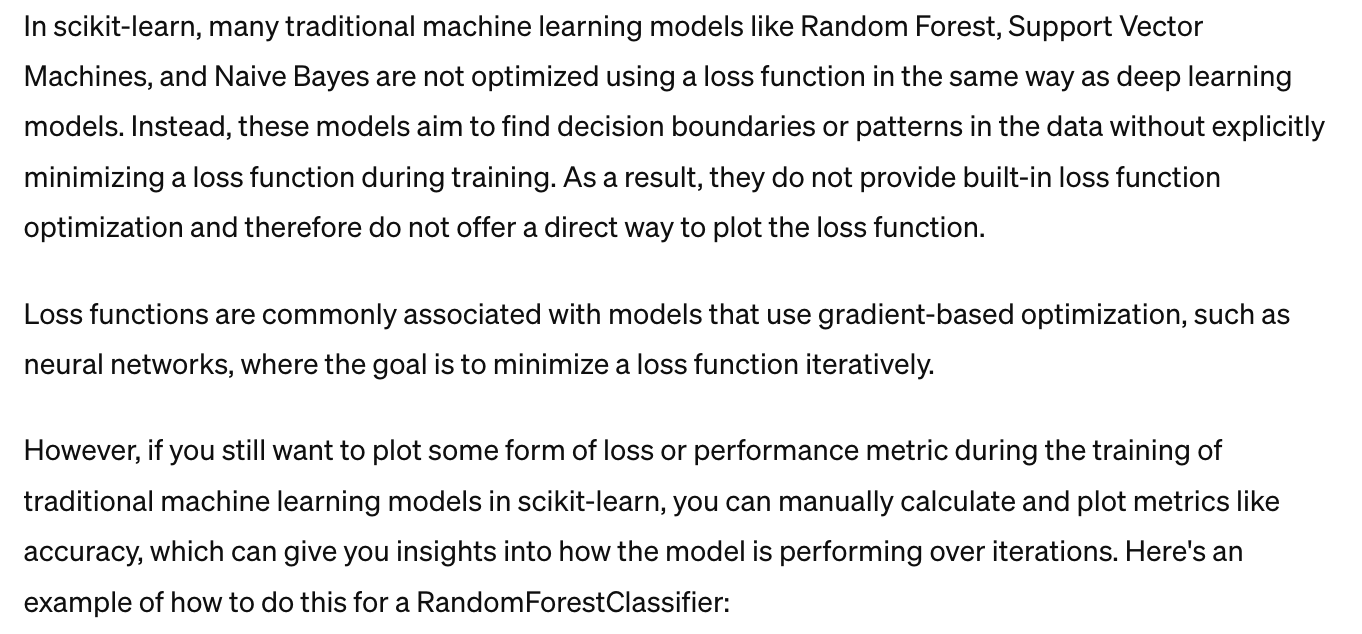

5- Define an evaluation index (other than Accuracy) and check how this new index can be italicized text

یکی از شاخص های ارزیابی متداول به غیر از دقت، امتیاز F1 است، به ویژه در مواردی که مجموعه داده های نامتعادل هستند که دقت ممکن است به تنهایی تصویر کاملی از عملکرد مدل ارائه نکند. امتیاز F1 دقت و یادآوری را با هم ترکیب می‌کند و آن را به
انتخابی مناسب برای چنین سناریوهایی تبدیل می‌کند
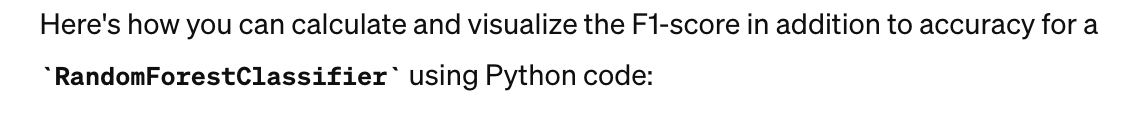

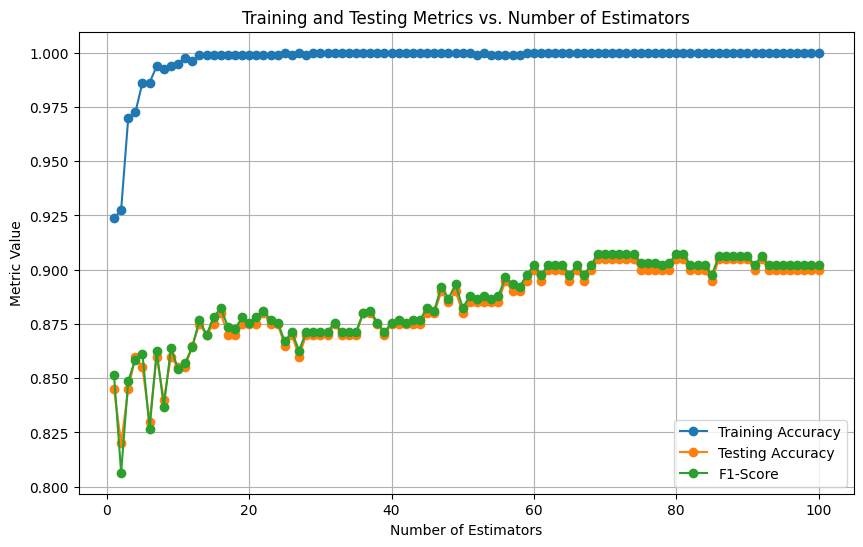

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Initialize a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Lists to store training progress
train_accuracies = []
test_accuracies = []
f1_scores = []

# Train the model and collect metrics at each step
for n_estimators in range(1, 101):  # Vary the number of estimators
    rf_classifier.n_estimators = n_estimators
    rf_classifier.fit(X_train, y_train)

    # Calculate accuracy and F1-score on training and testing data
    train_accuracy = accuracy_score(y_train, rf_classifier.predict(X_train))
    test_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))
    f1 = f1_score(y_test, rf_classifier.predict(X_test))

    # Append metrics to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    f1_scores.append(f1)

# Plot training and testing accuracies and F1-scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_accuracies, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(range(1, 101), test_accuracies, label='Testing Accuracy', marker='o', linestyle='-')
plt.plot(range(1, 101), f1_scores, label='F1-Score', marker='o', linestyle='-')
plt.title('Training and Testing Metrics vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()
